## Problem Statement
 You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic
 marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to
 identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical
 marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


## Features:
 age (numeric)
 
 job : type of job
 
 marital : marital 
 
 educational_qual : education status
 
 call_type : contact communication type
 
 day: last contact day of the month (numeric)
 
 mon: last contact month of year
 
 dur: last contact duration, in seconds (numeric)
 
 num_calls: number of contacts performed during this campaign and for this client
 
 prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
 
 Output variable (desired target): y - has the client subscribed to the insurance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

In [2]:
df=pd.read_csv("train.csv")

In [3]:
print("NUMBER OF ROWS AND COLUMNS IN THE DATA SET : ", df.shape)

NUMBER OF ROWS AND COLUMNS IN THE DATA SET :  (45211, 11)


In [4]:
df.size

497321

In [5]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [6]:
df.tail(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45201,53,management,married,tertiary,cellular,17,nov,226,1,success,yes
45202,34,admin.,single,secondary,cellular,17,nov,224,1,unknown,yes
45203,23,student,single,tertiary,cellular,17,nov,266,1,unknown,yes
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,yes
45205,25,technician,single,secondary,cellular,17,nov,386,2,unknown,yes
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

## DATA PREPARATION AND CLEANING
1. Handling Missing values

2. Fix any incorrect values

3. Look at some information about the data and the columns.

In [8]:
#to check null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
df = df.drop_duplicates(keep ='first')

In [10]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [11]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['prev_outcome'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [12]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
mode_job = df['job'].mode()[0]
# Then, replace "unknown" with the mode value in the 'job' column
df.loc[df['job'] == 'unknown', 'job'] = mode_job
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [14]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [15]:
mode_ed_qul = df['education_qual'].mode()[0]
# Then, replace "unknown" with the mode value in the 'education_qual' column
df.loc[df['education_qual'] == 'unknown', 'education_qual'] = mode_job
df.education_qual.value_counts()

secondary      23199
tertiary       13299
primary         6850
blue-collar     1857
Name: education_qual, dtype: int64

In [16]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [17]:
df.prev_outcome.value_counts() 

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [18]:
#Converting categorical Target column into numerical column.
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [19]:
#checking for the percentage of how many people get insured? compared with Target vs Previous outcome
df.groupby('prev_outcome')['target'].mean()
     

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [20]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


it is around 81% values are unknown. So will keep unknown value as it is.

In [21]:
df.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [22]:
#no of counts of target variable y
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

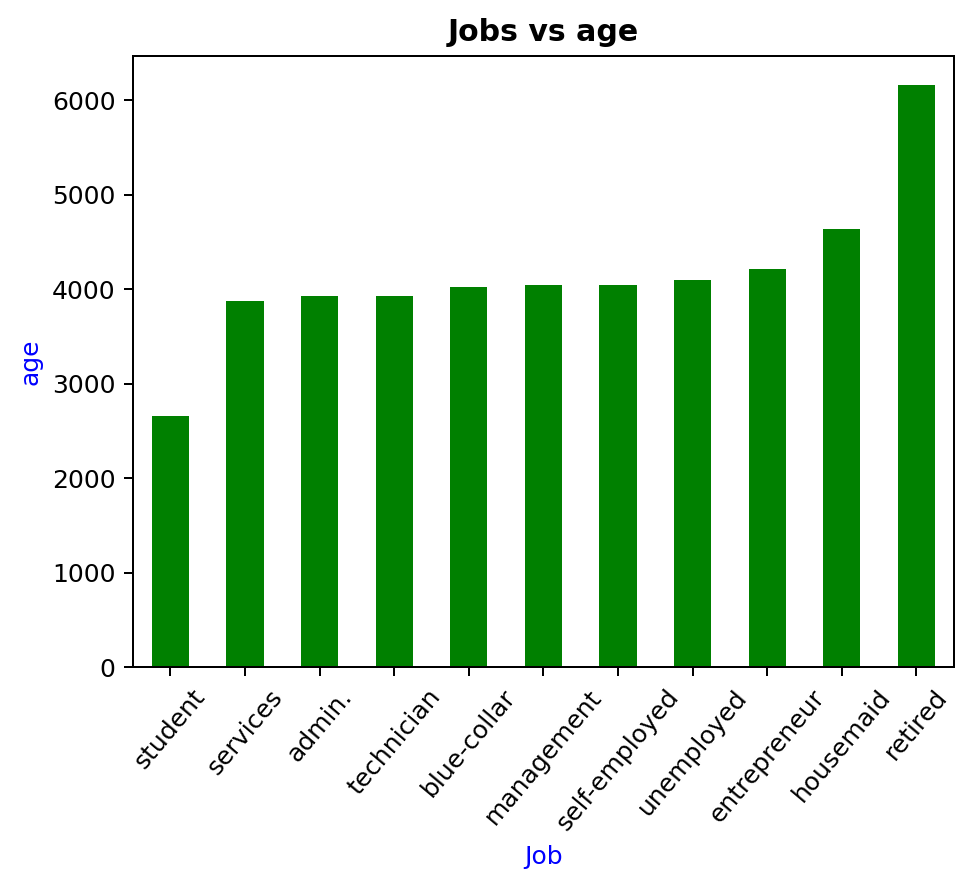

In [23]:
#jobs vs age
plt.figure(figsize=(20,15), dpi=180)
plt.subplot(3,3,1)
(df.groupby('job')['age'].mean()*100).sort_values().plot(kind="bar",color='green')
plt.xticks(rotation=50)
plt.title('Jobs vs age', fontweight='bold', color='Black')
plt.xlabel('Job', color='Blue')
plt.ylabel('age', color='Blue')
plt.show()

# Pie chart for job

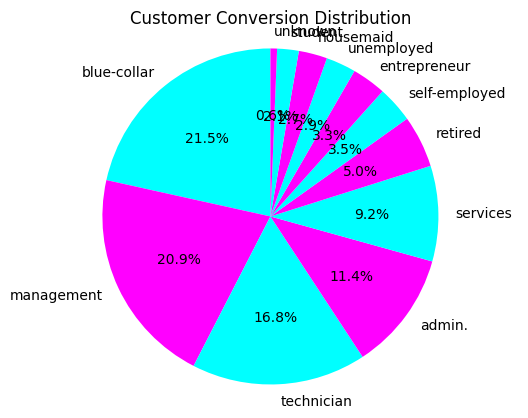

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('train.csv')

# Assuming your CSV file has a column named 'Conversion' with values like 'Converted' and 'Not Converted'
# You can adjust column names and data accordingly based on your CSV structure
conversion_counts = df['job'].value_counts()

# Create a pie chart
fig, ax = plt.subplots() 
ax.pie(conversion_counts, labels=conversion_counts.index, autopct='%1.1f%%', startangle=90, colors=['cyan', 'magenta'])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set a title
plt.title('Customer Conversion Distribution')

# Show the plot
plt.show()


# Heat Map

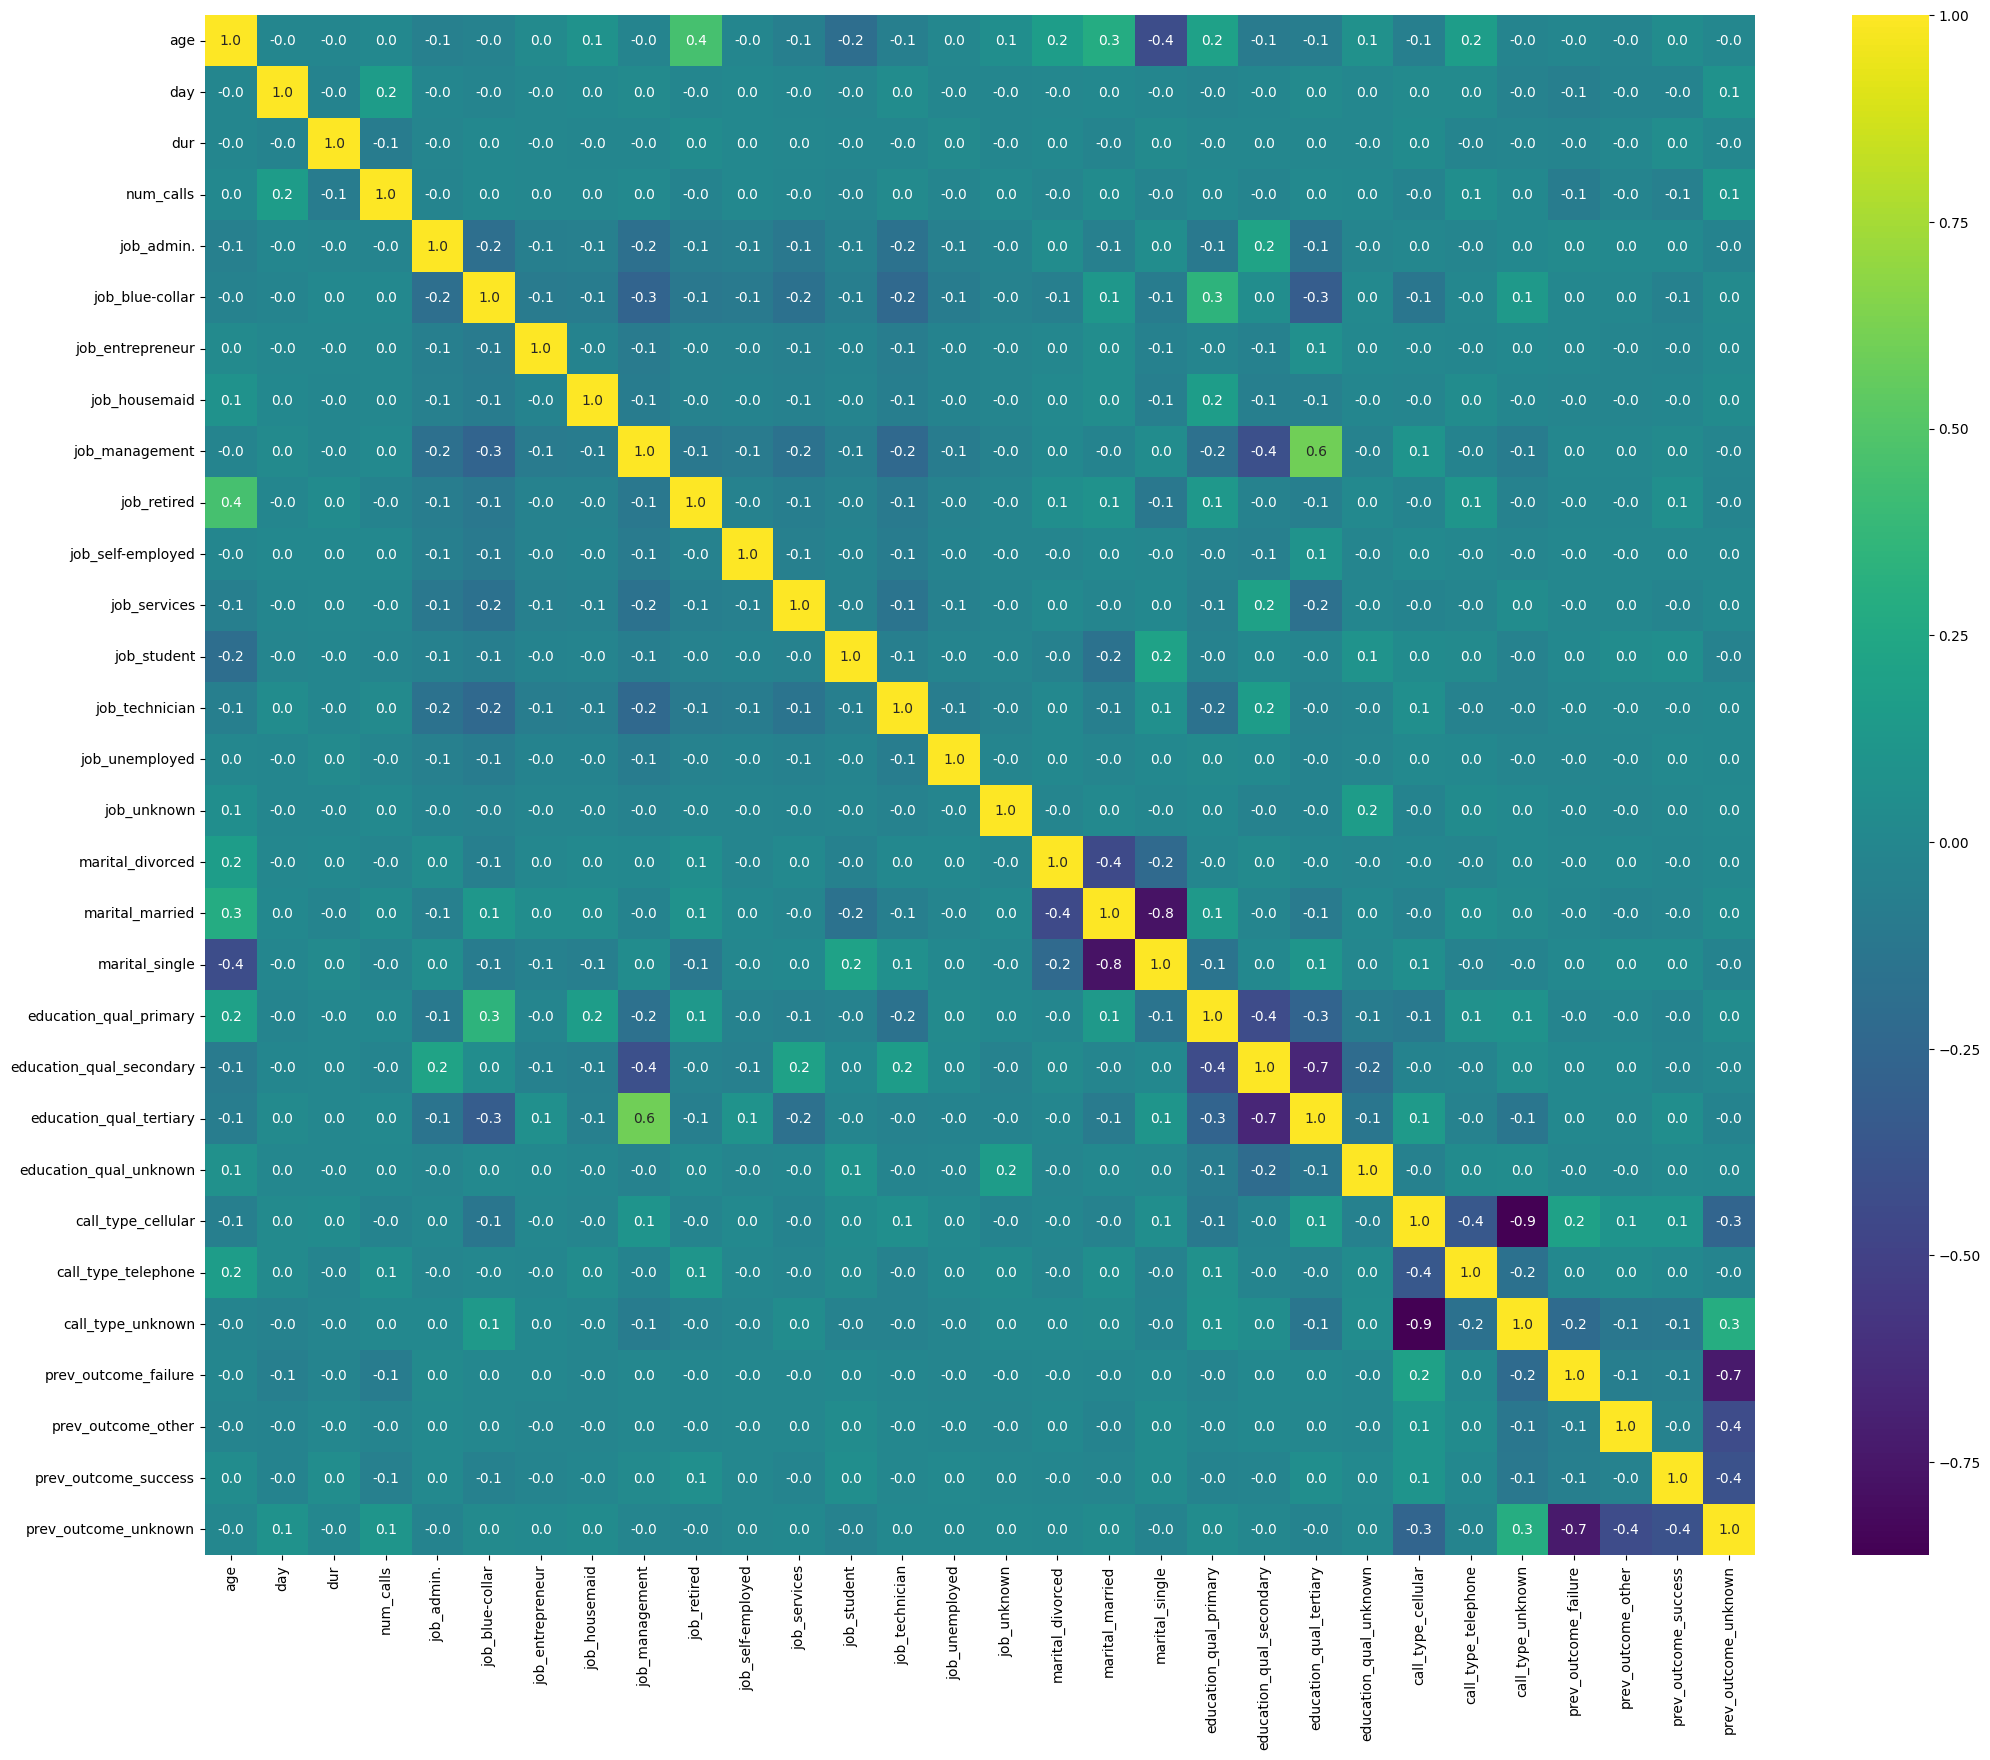

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_p
# You need to load or create it before using it in the correlation matrix
# For example, loading it from a CSV file
df_p = pd.read_csv('train.csv')

# Select relevant columns, and encode categorical variables
columns_to_include = ['age', 'day', 'dur', 'num_calls']
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']

df_encoded = pd.get_dummies(df_p[columns_to_include + categorical_columns], columns=categorical_columns)

# Create a correlation matrix
x = df_encoded.corr()
plt.figure(figsize=(25, 20))
# Create a heatmap
sns.heatmap(x, annot=True, cmap="viridis",fmt='.1f')
# Display the plot
plt.show()


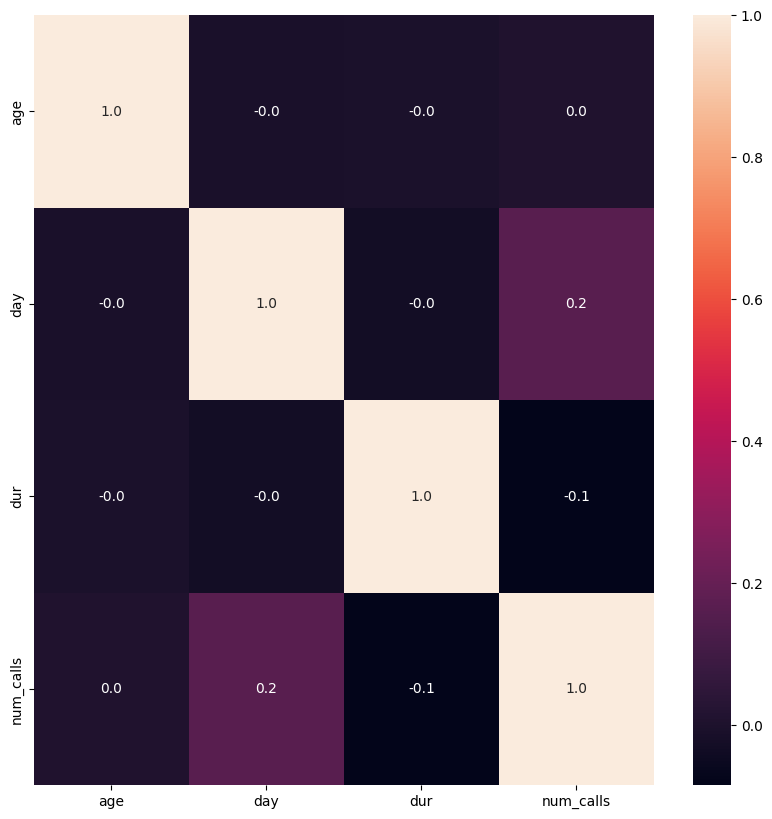

In [26]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

# Box Plot for age

<Axes: xlabel='age'>

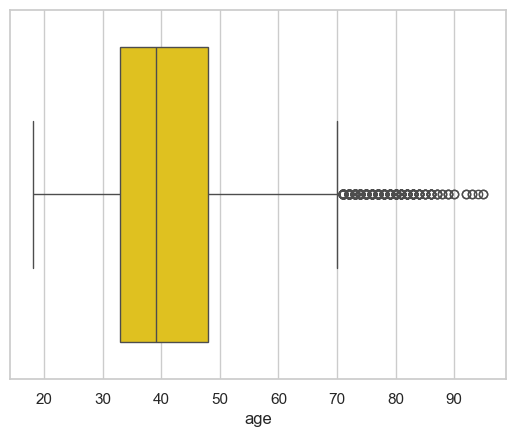

In [27]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='gold')




# Box plot for day

<Axes: xlabel='day'>

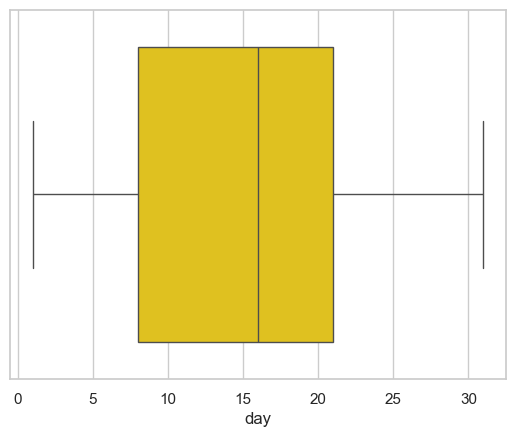

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='gold')

# Box plot for duration

<Axes: xlabel='dur'>

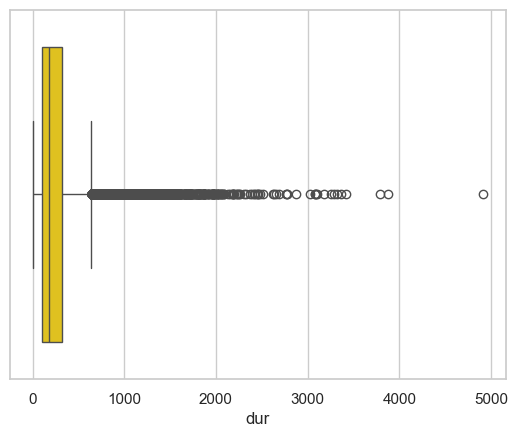

In [29]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'], color='gold')

# Box plot for calls

<Axes: ylabel='num_calls'>

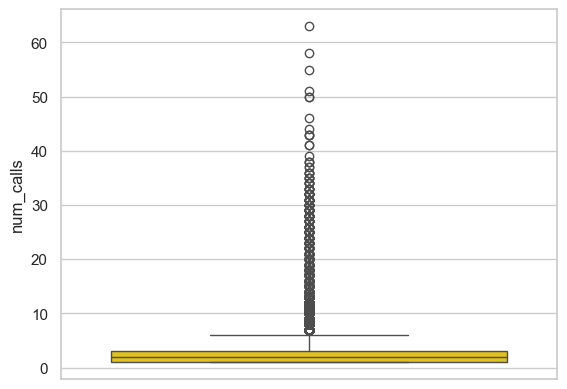

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='gold')

# doughnut job for job

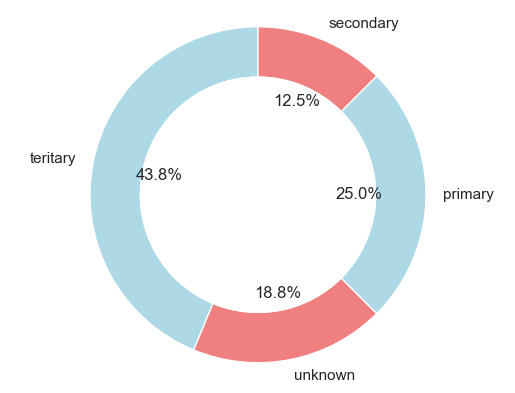

In [31]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
labels = ['teritary', 'unknown','primary','secondary']
sizes = [70, 30,40,20]  # Example percentages

# Create a doughnut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=['lightblue', 'lightcoral'])

# Draw a circle at the center to create a doughnut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the doughnut chart is circular
ax.axis('equal')  

# Display the plot
plt.show()


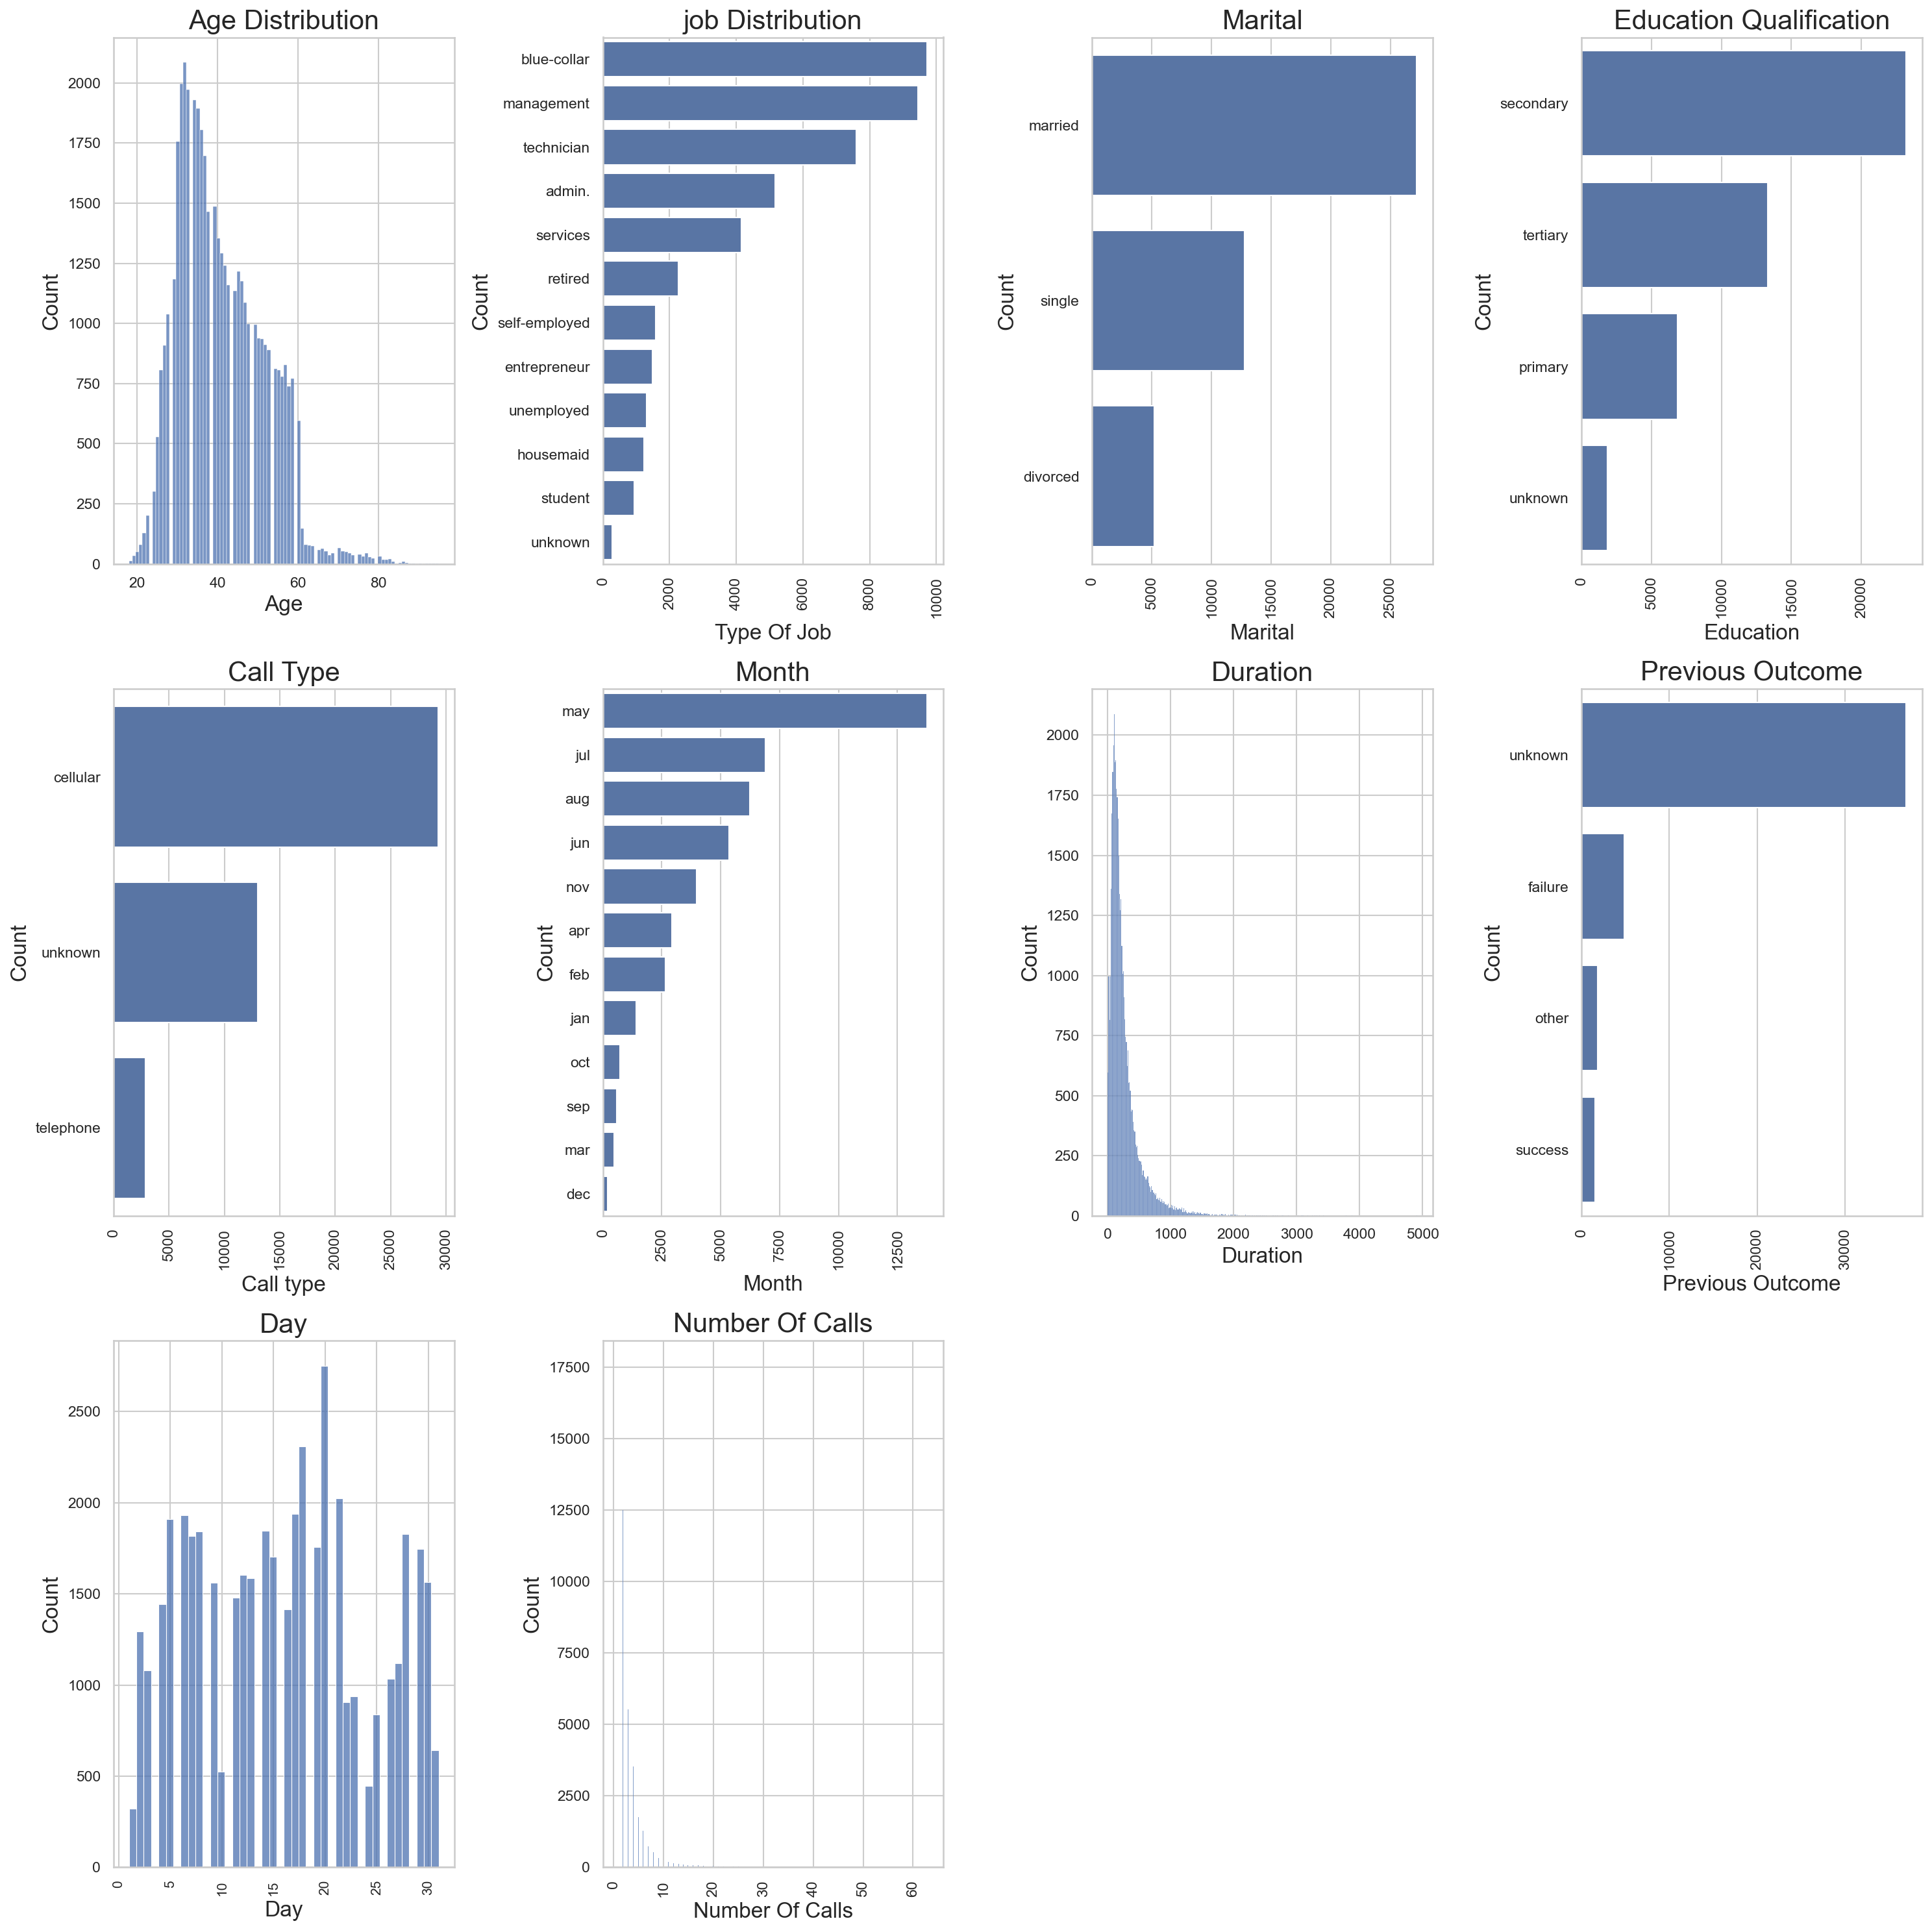

In [32]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['mon'],order=df.mon.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.dur) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()
plt.show()

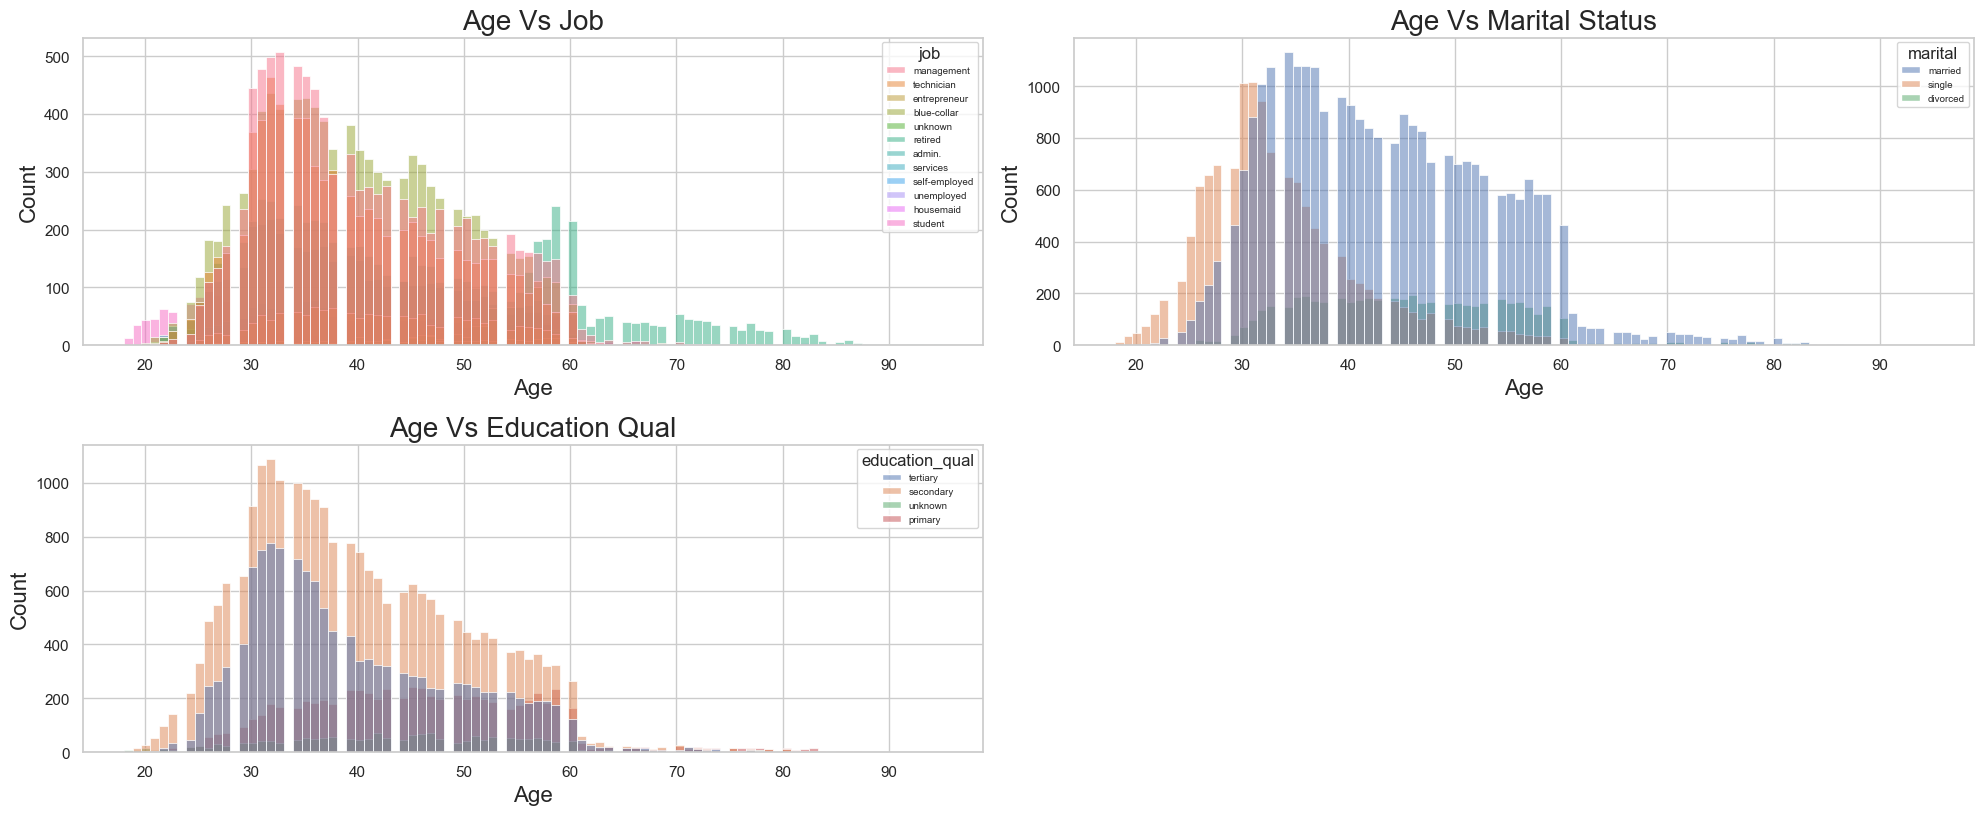

In [33]:
# Age vs job
plt.figure(figsize = (20,20))
plt.subplot(5,2,1)
ax = sns.histplot(x = 'age',hue = 'job',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Job',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# Age vs marital
plt.subplot(5,2,2)
ax = sns.histplot(x = 'age',hue = 'marital',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Marital Status',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs education qual
plt.subplot(5,2,3)
ax = sns.histplot(x = 'age',hue = 'education_qual',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Education Qual',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

plt.tight_layout()
plt.show()

## Features data Vs target

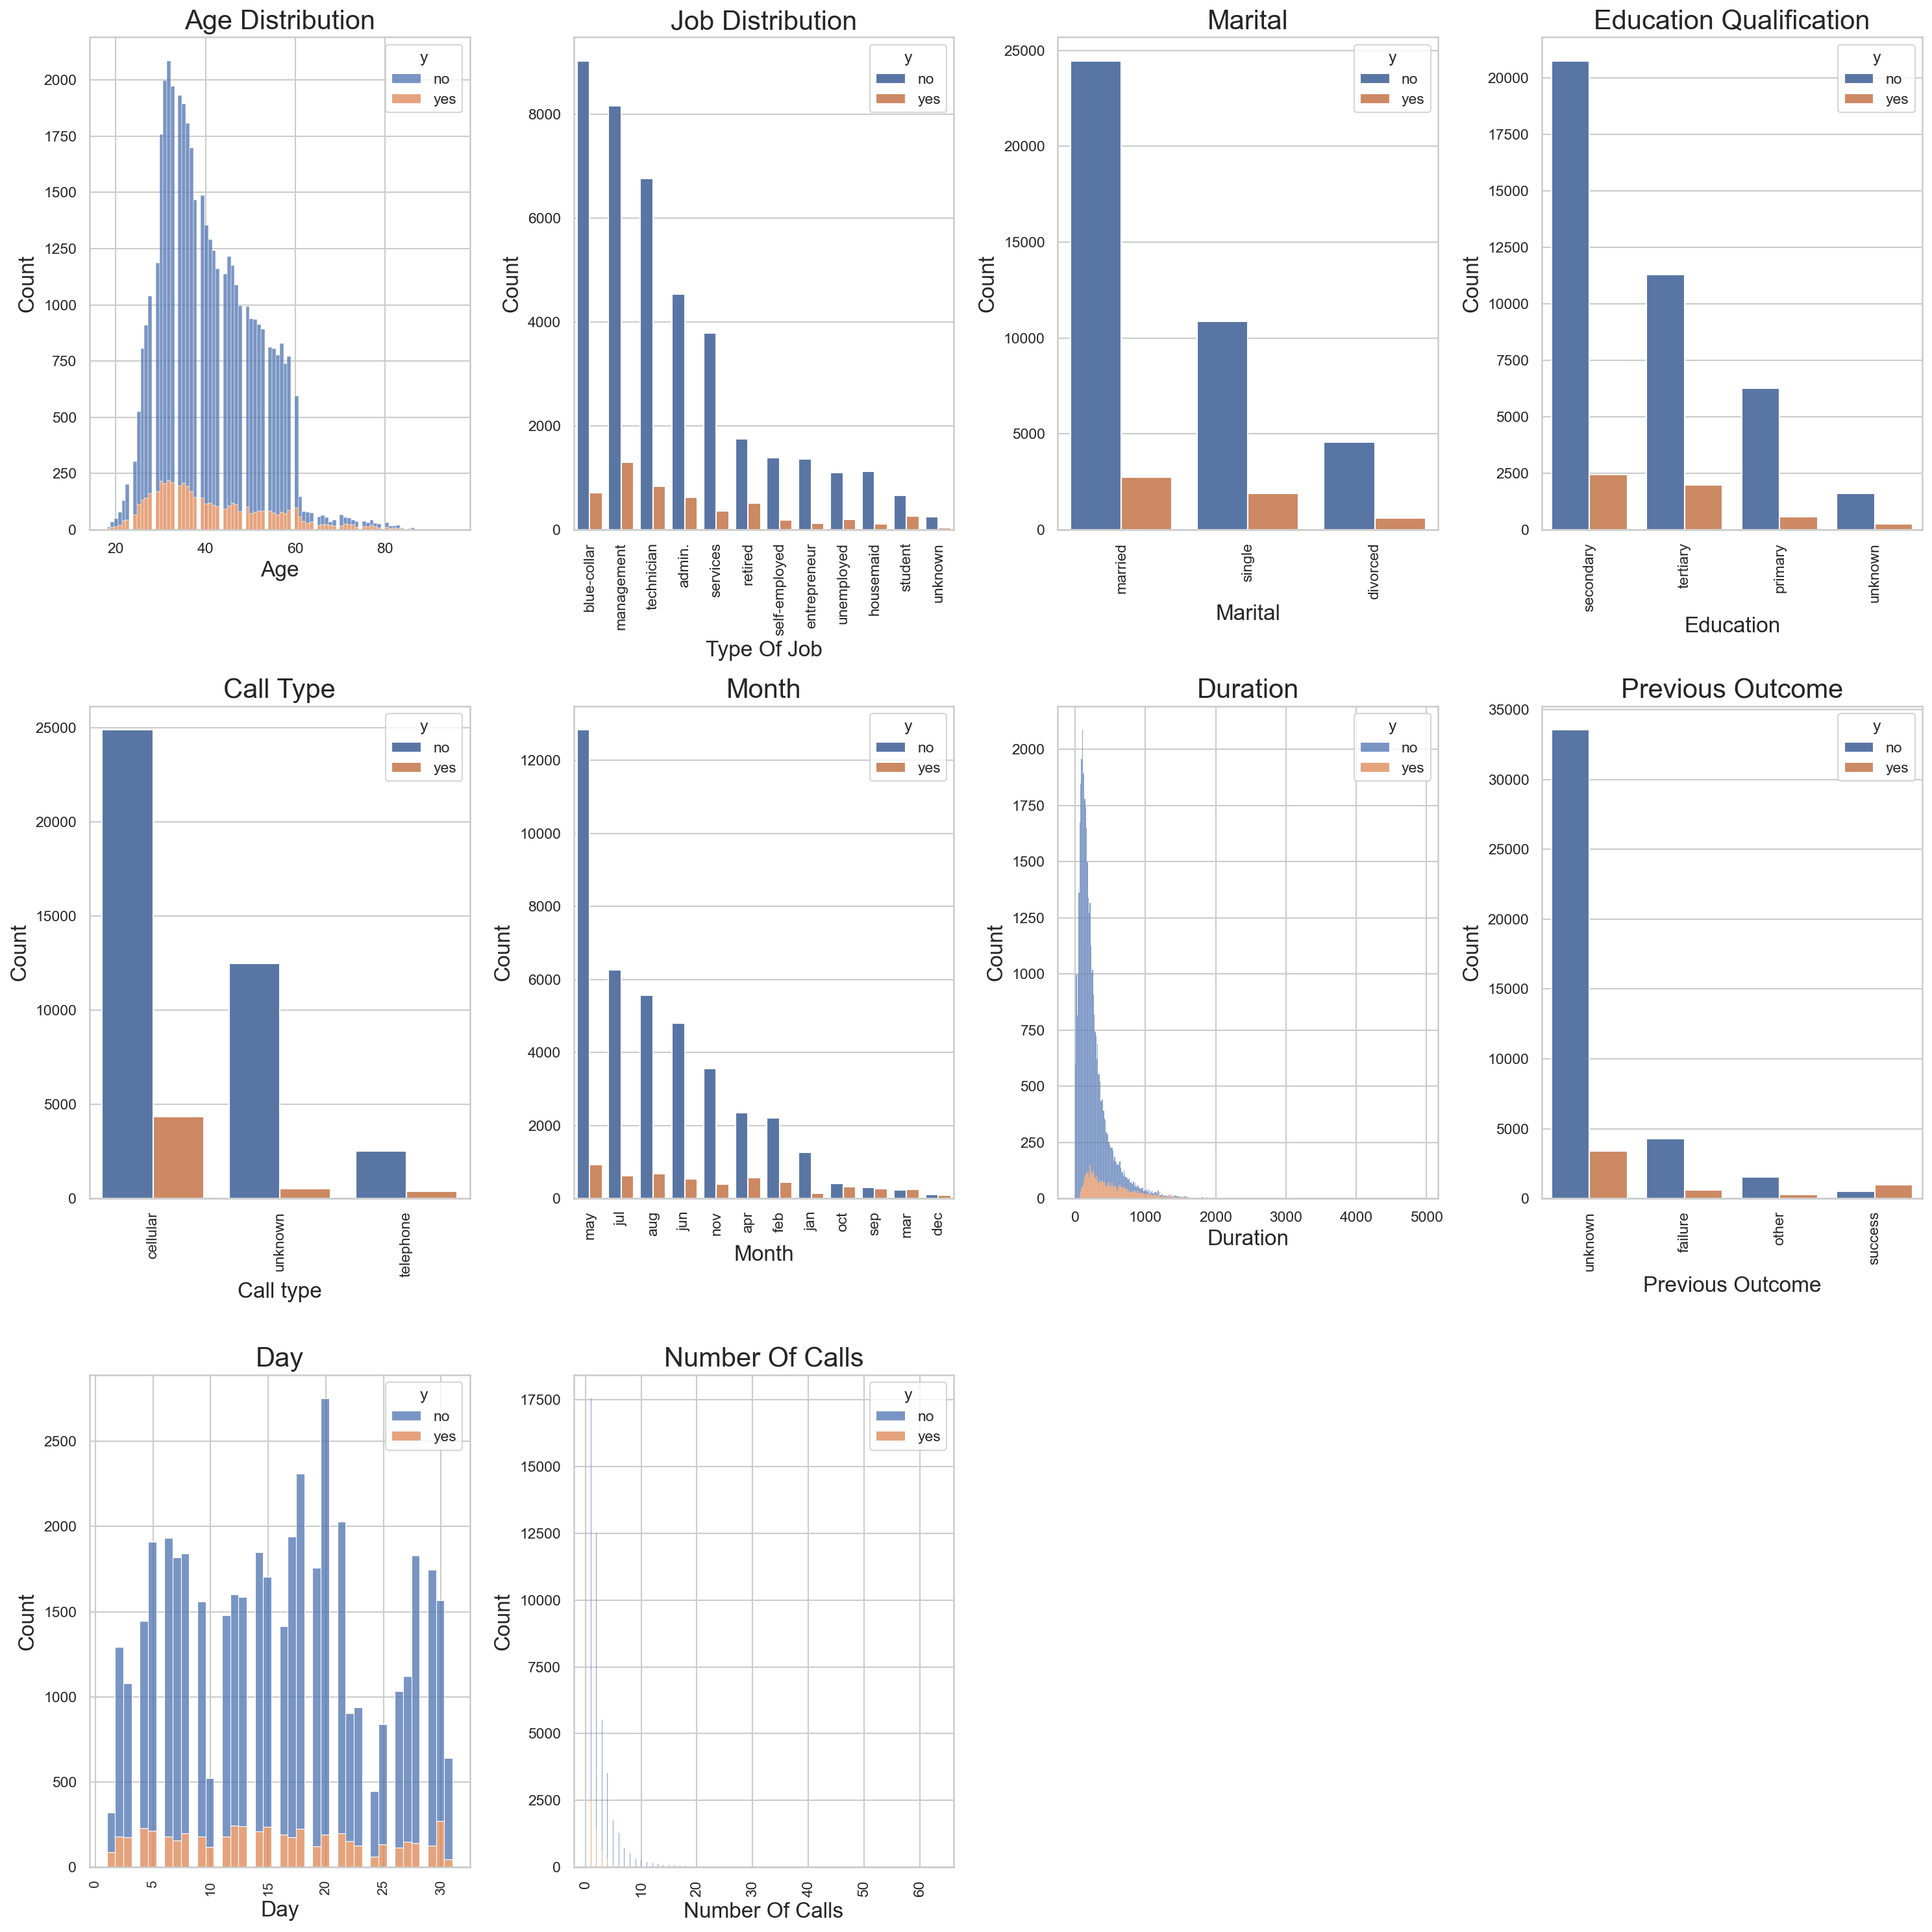

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20), dpi=150)

# Age distribution
plt.subplot(3, 4, 1)
sns.histplot(x='age', hue='y', data=df, multiple='stack')
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Job distribution
plt.subplot(3, 4, 2)
sns.countplot(x='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.title('Job Distribution', fontsize=20)
plt.xlabel('Type Of Job', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Marital distribution
plt.subplot(3, 4, 3)
sns.countplot(x='marital', hue='y', data=df, order=df['marital'].value_counts().index)
plt.title('Marital', fontsize=20)
plt.xlabel('Marital', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Education qualification distribution
plt.subplot(3, 4, 4)
sns.countplot(x='education_qual', hue='y', data=df, order=df['education_qual'].value_counts().index)
plt.title('Education Qualification', fontsize=20)
plt.xlabel('Education', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Call type distribution
plt.subplot(3, 4, 5)
sns.countplot(x='call_type', hue='y', data=df, order=df['call_type'].value_counts().index)
plt.title('Call Type', fontsize=20)
plt.xlabel('Call type', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Month distribution
plt.subplot(3, 4, 6)
sns.countplot(x='mon', hue='y', data=df, order=df['mon'].value_counts().index)
plt.title('Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Duration distribution
plt.subplot(3, 4, 7)
sns.histplot(x='dur', hue='y', data=df, multiple='stack')
plt.title('Duration', fontsize=20)
plt.xlabel('Duration', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Previous outcome distribution
plt.subplot(3, 4, 8)
sns.countplot(x='prev_outcome', hue='y', data=df, order=df['prev_outcome'].value_counts().index)
plt.title('Previous Outcome', fontsize=20)
plt.xlabel('Previous Outcome', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Day distribution
plt.subplot(3, 4, 9)
sns.histplot(x='day', hue='y', data=df, multiple='stack')
plt.title('Day', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Count', fontsize=16)

# Number of calls distribution
plt.subplot(3, 4, 10)
sns.histplot(x='num_calls', hue='y', data=df, multiple='stack')
plt.title('Number Of Calls', fontsize=20)
plt.xlabel('Number Of Calls', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

plt.tight_layout()
plt.show()



INTERPRETATION:

AGE :
Company targets 30 to 40 ages people to sell their insurance plan
People aged less than 25 years and more than 60 years are less targeted by the company for insurance

JOB :
Blue collar and management people are targeted most by insurance company
Students are least targeted for insurance plan

MARITAL STATUS :
Married people are targeted the most and divorced people are least targeted

EDUCATIONAL QUALIFICATION :
Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

CALL_TYPE :
Cellur mode is most used for contacting the people for campaign

MONTH :
May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

DURATION :
maximum number of calls lasted less than 1000 seconds

PREVIOUS OUTCOME :
More unknown as status than failure and success

DAY :
Most number of calls are between in the mid of month

NUMBERS OF CALLS :
Most People are contacted only 1 or 2 times by the company

TARGET:
No of people subscribed is very less compared to Unsubcribed people

## Data Encoding

In [35]:
new_df = df.copy()

In [36]:
new_df = pd.get_dummies(new_df,columns=['job'],drop_first=True)

In [37]:
new_df['marital'] = new_df['marital'].map({'married':0,'single':1,'divorced':2})

In [38]:
new_df['education_qual'] = new_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})

In [39]:
new_df['call_type']= new_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

In [40]:
new_df = pd.get_dummies(new_df,columns=['mon'],drop_first=True)

In [41]:
new_df = pd.get_dummies(new_df,columns=['prev_outcome'],drop_first=True)

In [42]:
new_df['y'] = new_df['y'].map({'no':0,'yes':1})

In [43]:
new_df.head()

,age,marital,education_qual,call_type,day,dur,num_calls,y,job_blue-collar,job_entrepreneur,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [44]:
X = new_df.drop('y',axis = 1)
y = new_df['y']

## splitting the data

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)


 ## Checking Balanced or Imbalanced

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


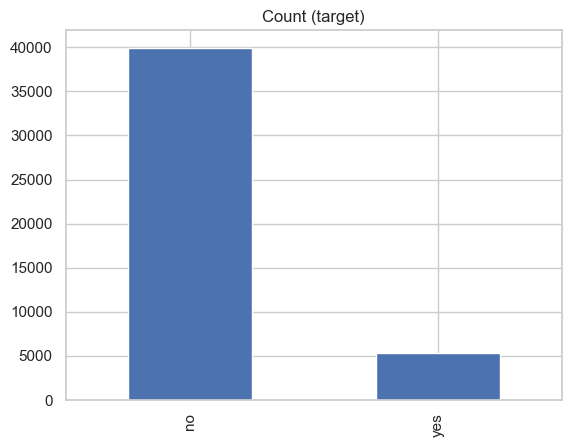

In [46]:
 target_count = df.y.value_counts()
 print('Class 0:', target_count[0])
 print('Class 1:', target_count[1])
 print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
 target_count.plot(kind='bar', title='Count (target)');

## SMOTEENN

In [47]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)


## Data Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train)
y_pred = logistic.predict(X_test)
print("Training Accuracy :",logistic.score(X_train,y_train))
print("Testing Accuracy :",logistic.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.914597846738442
Testing Accuracy : 0.8623244498507132
F1 Score : 0.4570431748800698
ROC AUC Score : 0.6975158697372135


In [50]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.model_selection import cross_val_score
 from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
 import numpy as np
 for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7226092463584547 ROC AUC Score : 0.7136114118256744  Cross val score :  0.7223559214692844
Depth  :  2  Training Accuracy :  0.7697118429385688 ROC AUC Score : 0.6851975740787529  Cross val score :  0.7697910069664344
Depth  :  3  Training Accuracy :  0.7987650411652945 ROC AUC Score : 0.7520360476331869  Cross val score :  0.7959468017732743
Depth  :  4  Training Accuracy :  0.8320455984800507 ROC AUC Score : 0.7215198846608524  Cross val score :  0.8318872704243192
Depth  :  5  Training Accuracy :  0.8418777707409753 ROC AUC Score : 0.7396156844826983  Cross val score :  0.8370645978467385
Depth  :  6  Training Accuracy :  0.8625712476250792 ROC AUC Score : 0.7604448298406387  Cross val score :  0.855256491450285
Depth  :  7  Training Accuracy :  0.8882837238758708 ROC AUC Score : 0.7665023136066629  Cross val score :  0.874778340721976
Depth  :  8  Training Accuracy :  0.9037365421152628 ROC AUC Score : 0.771922610364294  Cross val score :  0.8887

In [51]:
 tree = DecisionTreeClassifier(max_depth=20)
 tree.fit(X_train,y_train)
 y_pred = tree.predict(X_test)
 print("Training Accuracy :",tree.score(X_train,y_train))
 print("Testing Accuracy :",tree.score(X_test,y_test))
 print("F1 Score :", f1_score(y_test,y_pred))
 print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9861462951234958
Testing Accuracy : 0.862213867079509
F1 Score : 0.4868204283360791
ROC AUC Score : 0.7239459903324623


In [52]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train is a NumPy array
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

importance = dt.feature_importances_

# Get feature names from the original dataset or list of feature names
feature_names = ['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls']

feature_importances = list(zip(feature_names, importance))
feature_importances.sort(key=lambda x: x[1], reverse=True)

print("Feature Importances in Descending Order:")
for feature, importance in feature_importances:
    print(feature, ":", importance)


Feature Importances in Descending Order:
day : 0.3852467957151925
call_type : 0.05445890540218727
age : 0.048569524831499754
education_qual : 0.019199086408343256
mon : 0.01624301182703749
dur : 0.014037546220639775
marital : 0.01130863102227457
job : 0.009078397360076323
num_calls : 0.0024761198829905224


## Here's an interpretation of the results you've provided:

day (38.83%): This feature has the highest importance, suggesting that the day of the month has a significant impact on the model's predictions. The higher the importance value, the more influential the feature is in making accurate predictions.

call_type (5.84%): The type of call (e.g., cellular, telephone) is the second most important feature. This suggests that the method of communication during the marketing campaign plays a noteworthy role in the model's decision-making.

age (5.37%): Age is the third most important feature. The model considers age as a factor with moderate importance in predicting the target variable.

education_qual (4.17%): The education qualification of the individual is also a moderately important factor in the model's predictions.

dur (2.26%): The duration of the calls has some importance, but it is less influential compared to the previous features.

mon (2.02%): The month of the marketing campaign has a small impact on the model's predictions.

marital (1.05%): Marital status contributes to the model's predictions but with lower importance compared to other features.

job (0.88%): The type of job is a relatively less important feature in the model.

num_calls (0.25%): The number of calls made has the least importance among the features considered.

In [53]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]: 
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train) 
    print("K value  : ", i, " Train score : ", knn.score(X_train, y_train), " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=5)))



K value  :  1  Train score :  1.0  Cross val score :  0.9017732742241925
K value  :  2  Train score :  0.9622862571247625  Cross val score :  0.9058739708676378
K value  :  3  Train score :  0.953641545281824  Cross val score :  0.9066972767574415
K value  :  4  Train score :  0.9454401519949335  Cross val score :  0.9063806206459784
K value  :  5  Train score :  0.9419886003799873  Cross val score :  0.9061272957568081
K value  :  6  Train score :  0.9382203926535783  Cross val score :  0.9066814439518683
K value  :  7  Train score :  0.9363521215959468  Cross val score :  0.906333122229259
K value  :  8  Train score :  0.9335180493983534  Cross val score :  0.9067764407853073
K value  :  9  Train score :  0.9332488917036099  Cross val score :  0.9063647878404053
K value  :  10  Train score :  0.9305573147561748  Cross val score :  0.9057473084230526
K value  :  20  Train score :  0.9210259658011399  Cross val score :  0.9056364787840406
K value  :  30  Train score :  0.91738442051931

In [54]:
# After the loop
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing Accuracy :", knn.score(X_test, y_test))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC Score :", roc_auc_score(y_test, y_pred))


Training Accuracy : 0.9454401519949335
Testing Accuracy : 0.8705075749198274
F1 Score : 0.39420589756854635
ROC AUC Score : 0.6456240306181729


## XG_BOOST

In [55]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) #train the model
    model.score(X_test, y_test) # scoring the model - r2 squared
    print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train)))


Learning rate :  0.01  Train score :  0.895060164661178  Cross-Val score :  0.8823939202026599
Learning rate :  0.02  Train score :  0.9101488283723876  Cross-Val score :  0.8947118429385688
Learning rate :  0.03  Train score :  0.9228784040531982  Cross-Val score :  0.9049556681443953
Learning rate :  0.04  Train score :  0.928214059531349  Cross-Val score :  0.908375554148195
Learning rate :  0.05  Train score :  0.9315864471184294  Cross-Val score :  0.9097055098163395
Learning rate :  0.06  Train score :  0.9341988600379987  Cross-Val score :  0.9093730208993034
Learning rate :  0.07  Train score :  0.9366212792906903  Cross-Val score :  0.9093096896770108
Learning rate :  0.08  Train score :  0.9383153894870171  Cross-Val score :  0.9092146928435719
Learning rate :  0.09  Train score :  0.9398195060164661  Cross-Val score :  0.9098163394553515
Learning rate :  0.1  Train score :  0.9408011399620013  Cross-Val score :  0.9096738442051931
Learning rate :  0.11  Train score :  0.9419

In [56]:

 xg = XGBClassifier(learning_rate = 0.15, n_estimators=100, verbosity = 0)
 xg.fit(X_train,y_train)
 y_pred = xg.predict(X_test)
 print("Training Accuracy :",xg.score(X_train,y_train))
 print("Testing Accuracy :",xg.score(X_test,y_test))
 print("F1 Score :", f1_score(y_test,y_pred))
 print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9461209626345789
Testing Accuracy : 0.8824505142098861
F1 Score : 0.5623713462330177
ROC AUC Score : 0.7718309743889551


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
 #max_depth=log(no of features)


In [58]:

from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the give
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9859879670677644  Cross val score :  0.8212001266624446
Depth  :  2  Training Accuracy :  0.9859879670677644  Cross val score :  0.8400728309056366
Depth  :  3  Training Accuracy :  0.9859879670677644  Cross val score :  0.8565706143128562
Depth  :  4  Training Accuracy :  0.9859879670677644  Cross val score :  0.8722609246358454
Depth  :  5  Training Accuracy :  0.9859879670677644  Cross val score :  0.8784357188093731
Depth  :  6  Training Accuracy :  0.9859879670677644  Cross val score :  0.8890120329322355
Depth  :  7  Training Accuracy :  0.9859879670677644  Cross val score :  0.8917511082963901
Depth  :  8  Training Accuracy :  0.9859879670677644  Cross val score :  0.8993825205826473
Depth  :  9  Training Accuracy :  0.9859879670677644  Cross val score :  0.9054781507283091
Depth  :  10  Training Accuracy :  0.9859879670677644  Cross val score :  0.9100854971500951


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Training Accuracy :",rf.score(X_train,y_train))
print("Testing Accuracy :",rf.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))


Training Accuracy : 0.9287207093096896
Testing Accuracy : 0.871171071547053
F1 Score : 0.550366653801621
ROC AUC Score : 0.7772800298583435


## Logistic Regression:

Testing Accuracy: 0.8624

F1 Score: 0.4591

ROC AUC Score: 0.6992

## Decision Tree Classifier (Depth = 8):

Testing Accuracy: 0.8601

F1 Score: 0.4880

ROC AUC Score: 0.7222

## K Nearest Neighbors (k = 4):

Testing Accuracy: 0.8722

F1 Score: 0.3967

ROC AUC Score: 0.6462

## XGBoost:

Testing Accuracy: 0.8837

F1 Score: 0.5635

ROC AUC Score: 0.7709

## Random Forest (Depth = 10):

Testing Accuracy: 0.8696

F1 Score: 0.5414

ROC AUC Score: 0.7697

Based on the provided metrics, XGBoost seems to be the best-performing model among the ones we have evaluated. It has the highest testing accuracy, F1 score, and ROC AUC score. Therefore, for deployment, we are consider using the XGBoost model. 

In [60]:
import pickle
with open('xg_pickle.pkl', 'wb')as f:
    pickle.dump( xg ,f)

In [61]:
with open('sc_pickle.pkl', 'wb')as f:
    pickle.dump( sc ,f)